<a href="https://colab.research.google.com/github/debjyoti003/Important-Colab-Notebooks/blob/main/EDA_on_tweets_for_5_pre_processed_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
nltk.download('wordnet')
import nltk
import json
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
os.chdir(r'/content/drive/MyDrive/for EDA')
os.listdir()

['preprocessed_extracted_tweets.csv',
 'Preprocessed_tweets_df_USGS.csv',
 'Preprocessed_twitter_data_twint.csv']

In [ ]:
df = pd.read_csv(r'Preprocessed_twitter_data_twint.csv')
df.head()

,Unnamed: 0,date/time range,timezone,user_id,username,place,tweet,hashtags,Cleaned Tweets,category
0,0,2020-10-31 07:56:37,800,17580230,jarallen,Not Specified,@austinperroux @NWSSanAntonio Same here. I’ve ...,NoTags,"['austinperroux', 'NWSSanAntonio', 'I’ve', 'ne...",flood
1,1,2020-10-31 07:49:35,800,472122299,philippinestar,Not Specified,"Flooding (including flash floods), rain-induce...",NoTags,"['Flooding', 'including', 'flash', 'floods', '...",flood
2,2,2020-10-31 07:23:57,800,2453732882,ttweathercenter,Not Specified,7:20 PM - Flash flooding continues in Arouca t...,NoTags,"['720', 'PM', 'Flash', 'flooding', 'continues'...",flood
3,3,2020-10-31 07:12:06,800,2453732882,ttweathercenter,Not Specified,Another video of the flash flooding ongoing at...,NoTags,"['Another', 'video', 'flash', 'flooding', 'ong...",flood
4,4,2020-10-31 07:10:16,800,2453732882,ttweathercenter,Not Specified,7:05 PM - Flash flooding ongoing at Henry Stre...,NoTags,"['705', 'PM', 'Flash', 'flooding', 'ongoing', ...",flood


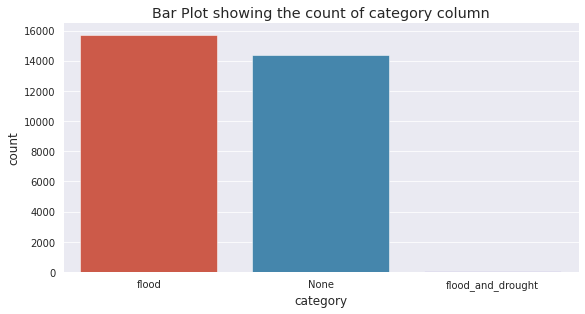

In [ ]:
sns.set_style('darkgrid')
sns.catplot(x = "category",data = df, kind = "count",height=4,aspect=2).set(title = 'Bar Plot showing the count of category column')
# sns.title('Bar Plot showing the count of category column')

In [ ]:
new_cleaned = []
for i in range(len(df['Cleaned Tweets'])):
  new_cleaned.append(df['Cleaned Tweets'][i].replace('[','').replace(']','').replace("'",'').split(','))
 
for i in range(len(new_cleaned)):
  for element in new_cleaned[i]:
    if element.__contains__('http'):
      new_cleaned[i].remove(element)
 
for i in range(len(new_cleaned)):
  for element in new_cleaned[i]:
    if element.__contains__('http'):
      new_cleaned[i].remove(element)

In [ ]:
df['Cleaned Further'] = new_cleaned
df.head()

,Unnamed: 0,date/time range,timezone,user_id,username,place,tweet,hashtags,Cleaned Tweets,category,Cleaned Further
0,0,2020-10-31 07:56:37,800,17580230,jarallen,Not Specified,@austinperroux @NWSSanAntonio Same here. I’ve ...,NoTags,"['austinperroux', 'NWSSanAntonio', 'I’ve', 'ne...",flood,"[austinperroux, NWSSanAntonio, I’ve, never,..."
1,1,2020-10-31 07:49:35,800,472122299,philippinestar,Not Specified,"Flooding (including flash floods), rain-induce...",NoTags,"['Flooding', 'including', 'flash', 'floods', '...",flood,"[Flooding, including, flash, floods, raini..."
2,2,2020-10-31 07:23:57,800,2453732882,ttweathercenter,Not Specified,7:20 PM - Flash flooding continues in Arouca t...,NoTags,"['720', 'PM', 'Flash', 'flooding', 'continues'...",flood,"[720, PM, Flash, flooding, continues, Aro..."
3,3,2020-10-31 07:12:06,800,2453732882,ttweathercenter,Not Specified,Another video of the flash flooding ongoing at...,NoTags,"['Another', 'video', 'flash', 'flooding', 'ong...",flood,"[Another, video, flash, flooding, ongoing,..."
4,4,2020-10-31 07:10:16,800,2453732882,ttweathercenter,Not Specified,7:05 PM - Flash flooding ongoing at Henry Stre...,NoTags,"['705', 'PM', 'Flash', 'flooding', 'ongoing', ...",flood,"[705, PM, Flash, flooding, ongoing, Henry..."


In [ ]:
def word_count(text):
  length = len(text)
  return length
 
df['Word count of each tweet'] = df['Cleaned Further'].apply(word_count)
df.head()

,Unnamed: 0,date/time range,timezone,user_id,username,place,tweet,hashtags,Cleaned Tweets,category,Cleaned Further,Word count of each tweet
0,0,2020-10-31 07:56:37,800,17580230,jarallen,Not Specified,@austinperroux @NWSSanAntonio Same here. I’ve ...,NoTags,"['austinperroux', 'NWSSanAntonio', 'I’ve', 'ne...",flood,"[austinperroux, NWSSanAntonio, I’ve, never,...",22
1,1,2020-10-31 07:49:35,800,472122299,philippinestar,Not Specified,"Flooding (including flash floods), rain-induce...",NoTags,"['Flooding', 'including', 'flash', 'floods', '...",flood,"[Flooding, including, flash, floods, raini...",21
2,2,2020-10-31 07:23:57,800,2453732882,ttweathercenter,Not Specified,7:20 PM - Flash flooding continues in Arouca t...,NoTags,"['720', 'PM', 'Flash', 'flooding', 'continues'...",flood,"[720, PM, Flash, flooding, continues, Aro...",14
3,3,2020-10-31 07:12:06,800,2453732882,ttweathercenter,Not Specified,Another video of the flash flooding ongoing at...,NoTags,"['Another', 'video', 'flash', 'flooding', 'ong...",flood,"[Another, video, flash, flooding, ongoing,...",18
4,4,2020-10-31 07:10:16,800,2453732882,ttweathercenter,Not Specified,7:05 PM - Flash flooding ongoing at Henry Stre...,NoTags,"['705', 'PM', 'Flash', 'flooding', 'ongoing', ...",flood,"[705, PM, Flash, flooding, ongoing, Henry...",15


In [ ]:
max(df['Word count of each tweet']), min(df['Word count of each tweet'])

(81, 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each tweet')

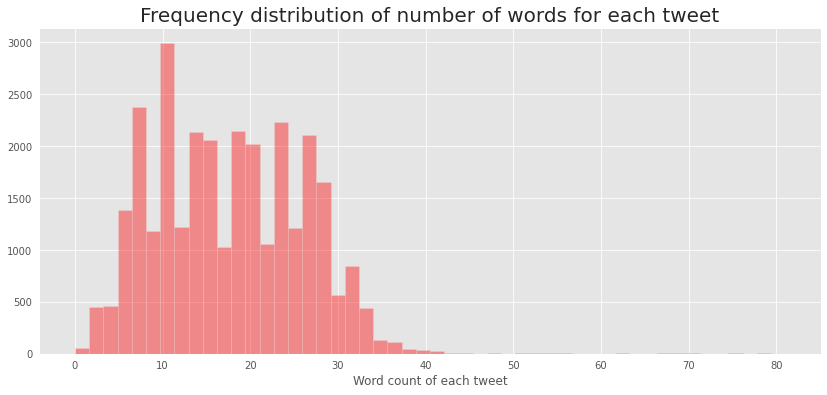

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(df['Word count of each tweet'],kde = False,color="red")
plt.title("Frequency distribution of number of words for each tweet", size=20)

**Word Cloud for the category 'Flood'**

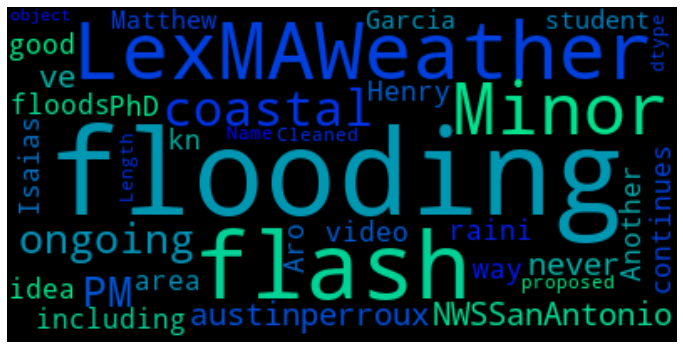

In [ ]:
cloud=WordCloud(colormap="winter").generate(str(df[df['category'] == 'flood']["Cleaned Further"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

**Word cloud for the category of 'None'**

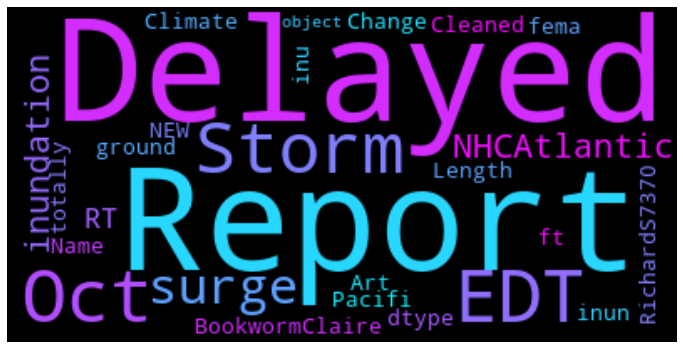

In [ ]:
cloud=WordCloud(colormap="cool").generate(str(df[df['category'] == 'None']["Cleaned Further"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

Text(0.5, 1.0, '30 most frequent words')

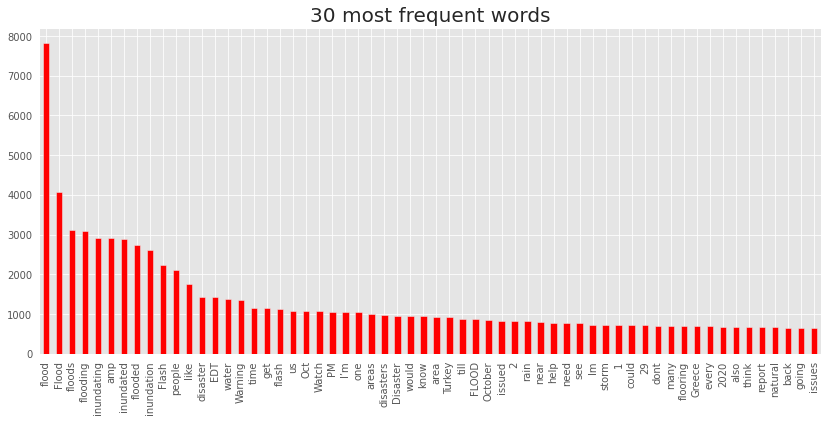

In [ ]:
def joined(text):
  return ' '.join(text)
 
df['Cleaned Joined'] = df['Cleaned Further'].apply(joined)
 
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df["Cleaned Joined"]).split()).value_counts()[:60]
freq.plot(kind="bar", color = "red")
plt.title("30 most frequent words",size=20)

In [ ]:
df['date/time range'] = pd.to_datetime(df['date/time range'])

df['Which Day'] = df['date/time range'].dt.day_name()
df['Year'] = df['date/time range'].dt.year
df['Month'] = (df['date/time range'].dt.month_name())

Text(0.5, 1.0, 'Frequecy showing which day has more data')

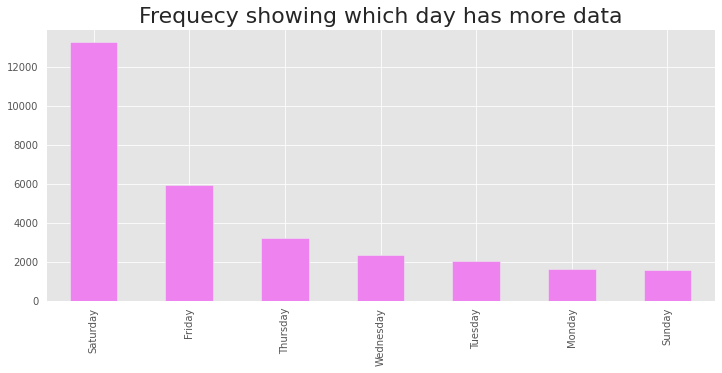

In [ ]:
plt.figure(figsize = (12,5))
df['Which Day'].value_counts().plot(kind = 'bar', color = 'violet')
plt.title('Frequecy showing which day has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which month has more data')

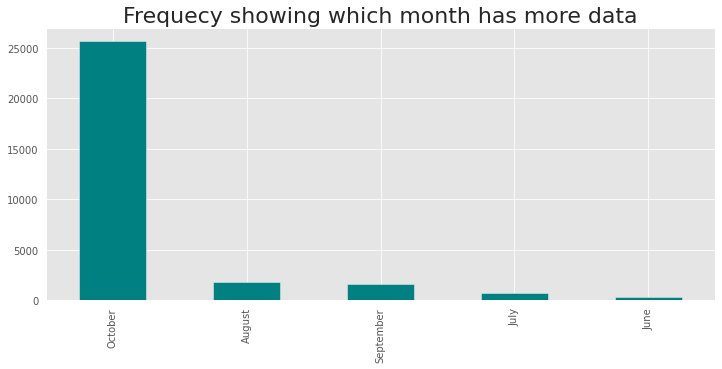

In [ ]:
plt.figure(figsize = (12,5))
df['Month'].value_counts().plot(kind = 'bar', color = 'teal')
plt.title('Frequecy showing which month has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which year has more data')

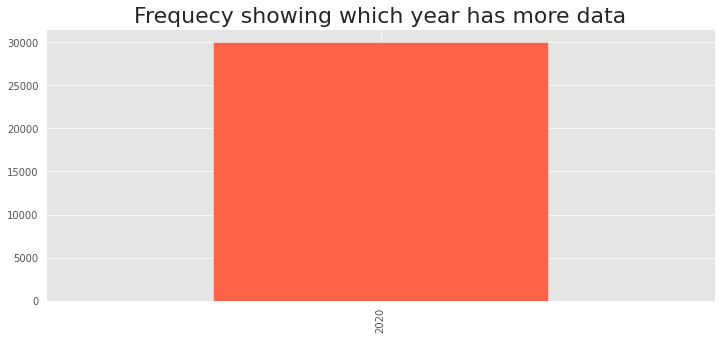

In [ ]:
plt.figure(figsize = (12,5))
df['Year'].value_counts().plot(kind = 'bar', color = 'tomato')
plt.title('Frequecy showing which year has more data', size = 22)

The above was EDA for the pre-processed file **Preprocessed_twitter_data_twint.csv**

#EDA for Preprocessed_tweets_df_USGS.csv

In [ ]:
df1 = pd.read_csv(r'Preprocessed_tweets_df_USGS.csv')
df1.head()

,Unnamed: 0,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language,Cleaned Tweets,category
0,0,1550621509,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 23:27:13,Kate Giannini,iahuntress,"Riverside, IA",NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood
1,1,308297667,RT @SenatorRobHogg: When @CityofCRIowa city co...,2021-05-12 23:23:50,LusciousPixie,LauriJax,"West Des Moines, IA",NaN,Not Specified,en,"['RT', 'SenatorRobHogg', 'When', 'CityofCRIowa...",None
2,2,1379199206771019779,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 22:45:19,Dave Muhlbauer,DaveMuhlbauer,Iowa,NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood
3,3,22962704,Ames Flood mitigation project dusting off the ...,2021-05-12 22:39:26,Roger Riley,rogerriley,Somewhere in Iowa USA,NaN,"Ames, IA",en,"['Ames', 'Flood', 'mitigation', 'project', 'du...",flood
4,4,1343943153427087361,IWX extends time of Flood Warning for Maumee R...,2021-05-12 22:07:55,WxChicagoland,ChicagolandWx,"Des Moines, Iowa",NaN,Not Specified,en,"['IWX', 'extends', 'time', 'Flood', 'Warning',...",flood


Text(0.5, 1.0, 'Bar Plot showing the count of category column')

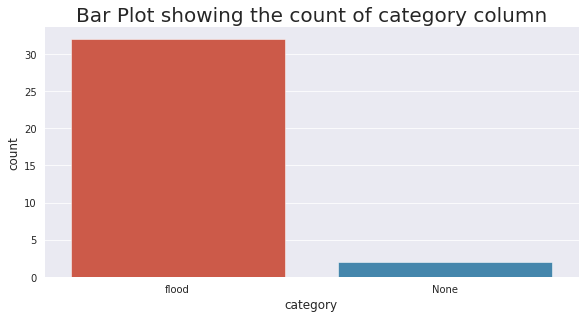

In [ ]:
sns.set_style('darkgrid')
sns.catplot(x = "category",data = df1, kind = "count",height=4,aspect=2)
plt.title('Bar Plot showing the count of category column', size = 20)

In [ ]:
new_cleaned1 = []
for i in range(len(df1['Cleaned Tweets'])):
  new_cleaned1.append(df1['Cleaned Tweets'][i].replace('[','').replace(']','').replace("'",'').split(','))

df1['Cleaned Further'] = new_cleaned1
df1.head()

,Unnamed: 0,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language,Cleaned Tweets,category,Cleaned Further
0,0,1550621509,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 23:27:13,Kate Giannini,iahuntress,"Riverside, IA",NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood,"[RT, katiepeikes, Iowa, scientists, develo..."
1,1,308297667,RT @SenatorRobHogg: When @CityofCRIowa city co...,2021-05-12 23:23:50,LusciousPixie,LauriJax,"West Des Moines, IA",NaN,Not Specified,en,"['RT', 'SenatorRobHogg', 'When', 'CityofCRIowa...",None,"[RT, SenatorRobHogg, When, CityofCRIowa, c..."
2,2,1379199206771019779,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 22:45:19,Dave Muhlbauer,DaveMuhlbauer,Iowa,NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood,"[RT, katiepeikes, Iowa, scientists, develo..."
3,3,22962704,Ames Flood mitigation project dusting off the ...,2021-05-12 22:39:26,Roger Riley,rogerriley,Somewhere in Iowa USA,NaN,"Ames, IA",en,"['Ames', 'Flood', 'mitigation', 'project', 'du...",flood,"[Ames, Flood, mitigation, project, dusting..."
4,4,1343943153427087361,IWX extends time of Flood Warning for Maumee R...,2021-05-12 22:07:55,WxChicagoland,ChicagolandWx,"Des Moines, Iowa",NaN,Not Specified,en,"['IWX', 'extends', 'time', 'Flood', 'Warning',...",flood,"[IWX, extends, time, Flood, Warning, Maum..."


In [ ]:
df1['Word count of each tweet'] = df1['Cleaned Further'].apply(word_count)
df1.head()

,Unnamed: 0,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language,Cleaned Tweets,category,Cleaned Further,Word count of each tweet
0,0,1550621509,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 23:27:13,Kate Giannini,iahuntress,"Riverside, IA",NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood,"[RT, katiepeikes, Iowa, scientists, develo...",15
1,1,308297667,RT @SenatorRobHogg: When @CityofCRIowa city co...,2021-05-12 23:23:50,LusciousPixie,LauriJax,"West Des Moines, IA",NaN,Not Specified,en,"['RT', 'SenatorRobHogg', 'When', 'CityofCRIowa...",None,"[RT, SenatorRobHogg, When, CityofCRIowa, c...",18
2,2,1379199206771019779,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 22:45:19,Dave Muhlbauer,DaveMuhlbauer,Iowa,NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood,"[RT, katiepeikes, Iowa, scientists, develo...",15
3,3,22962704,Ames Flood mitigation project dusting off the ...,2021-05-12 22:39:26,Roger Riley,rogerriley,Somewhere in Iowa USA,NaN,"Ames, IA",en,"['Ames', 'Flood', 'mitigation', 'project', 'du...",flood,"[Ames, Flood, mitigation, project, dusting...",16
4,4,1343943153427087361,IWX extends time of Flood Warning for Maumee R...,2021-05-12 22:07:55,WxChicagoland,ChicagolandWx,"Des Moines, Iowa",NaN,Not Specified,en,"['IWX', 'extends', 'time', 'Flood', 'Warning',...",flood,"[IWX, extends, time, Flood, Warning, Maum...",22


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each tweet')

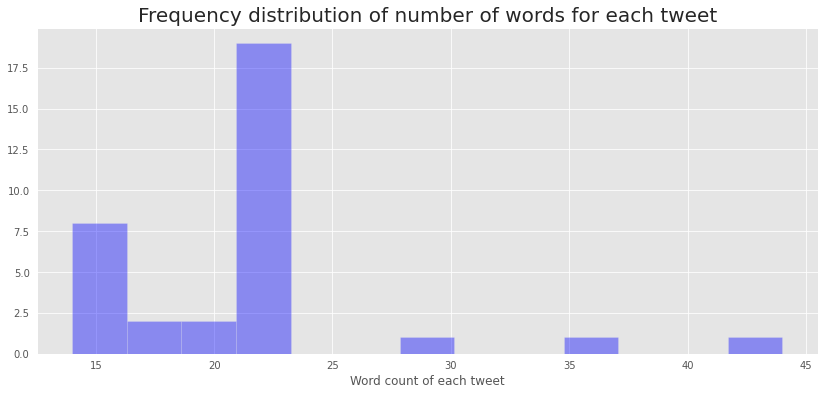

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(df1['Word count of each tweet'],kde = False,color="blue")
plt.title("Frequency distribution of number of words for each tweet", size=20)

**Word cloud for the category of 'Flood'**

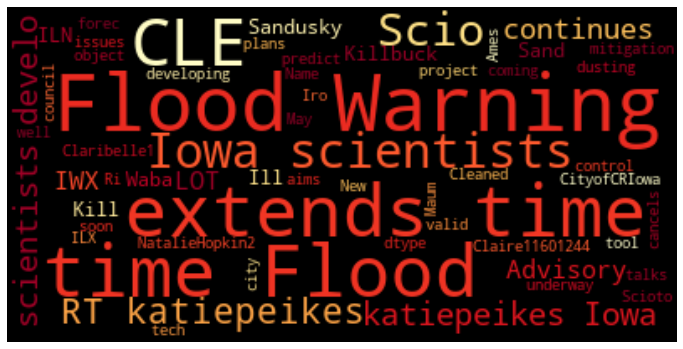

In [ ]:
cloud=WordCloud(colormap="YlOrRd").generate(str(df1[df1['category'] == 'flood']["Cleaned Further"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

**Word Cloud for the category of 'None'**

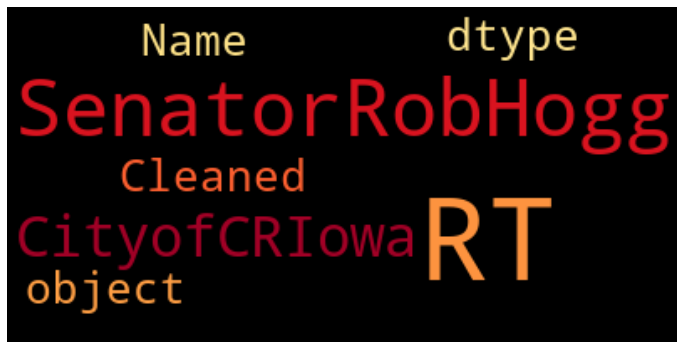

In [ ]:
cloud=WordCloud(colormap="YlOrRd").generate(str(df1[df1['category'] == 'None']["Cleaned Further"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

Text(0.5, 1.0, '30 most frequent words')

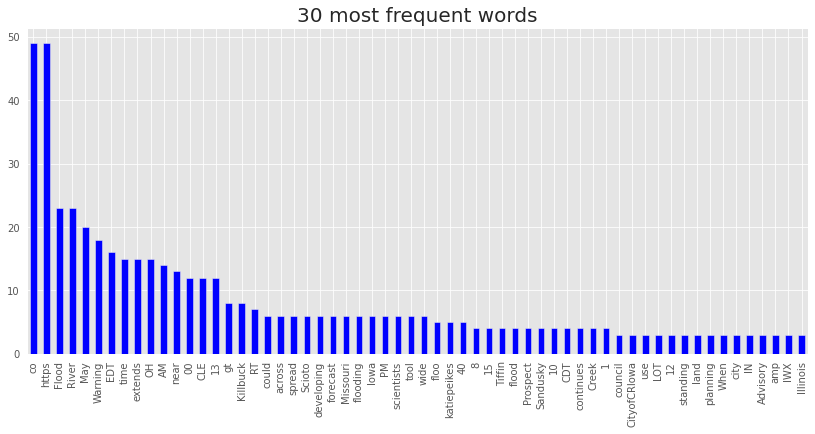

In [ ]:
def joined(text):
  return ' '.join(text)

df1['Cleaned Joined'] = df1['Cleaned Further'].apply(joined)

plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df1["Cleaned Joined"]).split()).value_counts()[:60]
freq.plot(kind="bar", color = "blue")
plt.title("30 most frequent words",size=20)

In [ ]:
df1['Tweet Time'] = pd.to_datetime(df1['Tweet Time'])

df1['Which Day'] = df1['Tweet Time'].dt.day_name()
df1['Year'] = df1['Tweet Time'].dt.year
df1['Month'] = (df1['Tweet Time'].dt.month_name())

***Date Analysis***

Text(0.5, 1.0, 'Frequecy showing which day has more data')

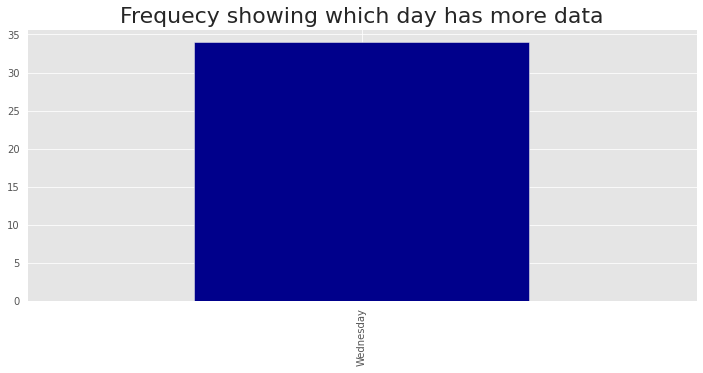

In [ ]:
plt.figure(figsize = (12,5))
df1['Which Day'].value_counts().plot(kind = 'bar', color = 'darkblue')
plt.title('Frequecy showing which day has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which month has more data')

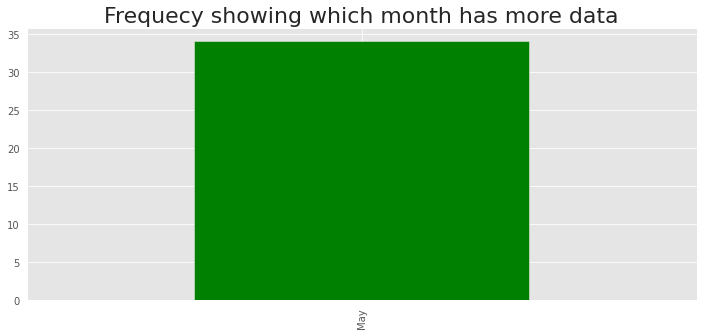

In [ ]:
plt.figure(figsize = (12,5))
df1['Month'].value_counts().plot(kind = 'bar', color = 'green')
plt.title('Frequecy showing which month has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which year has more data')

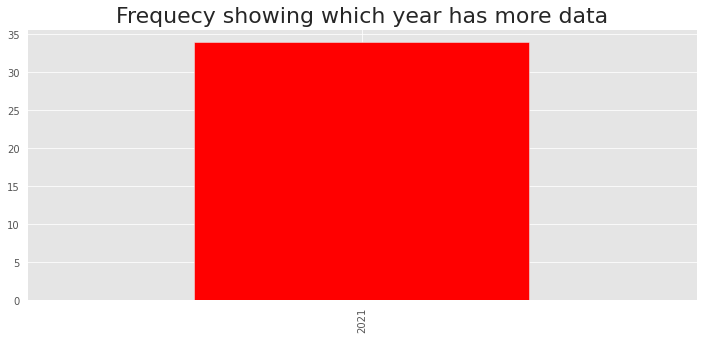

In [ ]:
plt.figure(figsize = (12,5))
df1['Year'].value_counts().plot(kind = 'bar', color = 'red')
plt.title('Frequecy showing which year has more data', size = 22)

# EDA for preprocessed_extracted_tweets.csv

In [ ]:
df2 = pd.read_csv(r'preprocessed_extracted_tweets.csv')
df2.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,urls,photos,hashtags,link,retweet,quote_url,video,Cleaned Tweets,Cleaned Tweets Further,Location Name
0,0,1.392400e+18,1.392400e+18,2021-05-12 14:01:43 India Standard Time,12-05-2021,14:01:43,530,8.929951e+08,ifrcafrica,IFRC Africa,NaN,"Across Africa, at any given time, Red Cross an...",en,['http://bit.ly/2RNeRSU'],['https://pbs.twimg.com/media/E1LJvvxWEAIRV86....,['floods'],https://twitter.com/IFRCAfrica/status/13923970...,False,NaN,1,"across africa, at any given time, red cross an...",across africa at any given time red cross an...,[]
1,1,1.392400e+18,1.392400e+18,2021-05-12 13:55:41 India Standard Time,12-05-2021,13:55:41,530,9.085950e+17,wanjohikinguru,Wanjohi King'uru,NaN,Poor drainage in Transami means we have to end...,en,[],[],"['nairobi', 'floods']",https://twitter.com/WanjohiKinguru/status/1392...,False,NaN,1,poor drainage in transami means we have to end...,poor drainage in transami means we have to end...,[]
2,2,1.392390e+18,1.392390e+18,2021-05-12 13:35:46 India Standard Time,12-05-2021,13:35:46,530,1.604304e+07,ncedigital,New Civil Engineer,NaN,Daily brief: 🌥️ Queen's Speech intensifies #H...,en,"['https://buff.ly/3eDdK1i', 'https://buff.ly/3...",['https://pbs.twimg.com/media/E1LDz05XIAAptuR....,"['hs2', 'engineering', 'civilengineering', 'ra...",https://twitter.com/ncedigital/status/13923905...,False,NaN,1,daily brief: 🌥️ queen's speech intensifies hs2...,daily brief queen s speech intensifies hs2...,[]
3,3,1.392390e+18,1.392390e+18,2021-05-12 13:34:05 India Standard Time,12-05-2021,13:34:05,530,2.985111e+09,malurussally,Sally Forsstrom,NaN,#climate change impacts here already with #dro...,en,[],[],"['climate', 'drought', 'bushfires', 'floods', ...",https://twitter.com/MalurusSally/status/139239...,False,https://twitter.com/shoebridgemlc/status/13922...,0,climate change impacts here already with droug...,climate change impacts here already with droug...,[]
4,4,1.392390e+18,1.392390e+18,2021-05-12 13:29:27 India Standard Time,12-05-2021,13:29:27,530,8.565930e+17,infonile,InfoNile,NaN,"🧵: This is Thirst in a River Basin, an interac...",en,['https://maps.infonile.org/covid-water-scarci...,['https://pbs.twimg.com/media/E1LCXHmXoAM1J_9....,"['infomap', 'rainfall', 'droughts', 'floods', ...",https://twitter.com/infoNILE/status/1392388939...,False,NaN,1,"🧵: this is thirst in a river basin, an interac...",this is thirst in a river basin an interac...,[]


In [ ]:
def small_preprocess(text):
  clean = text.strip()
  clean=re.sub("\s{2,}"," ",clean)
  return clean

df2['Cleaned Tweets Further'] = df2['Cleaned Tweets Further'].apply(small_preprocess)
df2.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,urls,photos,hashtags,link,retweet,quote_url,video,Cleaned Tweets,Cleaned Tweets Further,Location Name
0,0,1.392400e+18,1.392400e+18,2021-05-12 14:01:43 India Standard Time,12-05-2021,14:01:43,530,8.929951e+08,ifrcafrica,IFRC Africa,NaN,"Across Africa, at any given time, Red Cross an...",en,['http://bit.ly/2RNeRSU'],['https://pbs.twimg.com/media/E1LJvvxWEAIRV86....,['floods'],https://twitter.com/IFRCAfrica/status/13923970...,False,NaN,1,"across africa, at any given time, red cross an...",across africa at any given time red cross and ...,[]
1,1,1.392400e+18,1.392400e+18,2021-05-12 13:55:41 India Standard Time,12-05-2021,13:55:41,530,9.085950e+17,wanjohikinguru,Wanjohi King'uru,NaN,Poor drainage in Transami means we have to end...,en,[],[],"['nairobi', 'floods']",https://twitter.com/WanjohiKinguru/status/1392...,False,NaN,1,poor drainage in transami means we have to end...,poor drainage in transami means we have to end...,[]
2,2,1.392390e+18,1.392390e+18,2021-05-12 13:35:46 India Standard Time,12-05-2021,13:35:46,530,1.604304e+07,ncedigital,New Civil Engineer,NaN,Daily brief: 🌥️ Queen's Speech intensifies #H...,en,"['https://buff.ly/3eDdK1i', 'https://buff.ly/3...",['https://pbs.twimg.com/media/E1LDz05XIAAptuR....,"['hs2', 'engineering', 'civilengineering', 'ra...",https://twitter.com/ncedigital/status/13923905...,False,NaN,1,daily brief: 🌥️ queen's speech intensifies hs2...,daily brief queen s speech intensifies hs2 anx...,[]
3,3,1.392390e+18,1.392390e+18,2021-05-12 13:34:05 India Standard Time,12-05-2021,13:34:05,530,2.985111e+09,malurussally,Sally Forsstrom,NaN,#climate change impacts here already with #dro...,en,[],[],"['climate', 'drought', 'bushfires', 'floods', ...",https://twitter.com/MalurusSally/status/139239...,False,https://twitter.com/shoebridgemlc/status/13922...,0,climate change impacts here already with droug...,climate change impacts here already with droug...,[]
4,4,1.392390e+18,1.392390e+18,2021-05-12 13:29:27 India Standard Time,12-05-2021,13:29:27,530,8.565930e+17,infonile,InfoNile,NaN,"🧵: This is Thirst in a River Basin, an interac...",en,['https://maps.infonile.org/covid-water-scarci...,['https://pbs.twimg.com/media/E1LCXHmXoAM1J_9....,"['infomap', 'rainfall', 'droughts', 'floods', ...",https://twitter.com/infoNILE/status/1392388939...,False,NaN,1,"🧵: this is thirst in a river basin, an interac...",this is thirst in a river basin an interactive...,[]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each tweet')

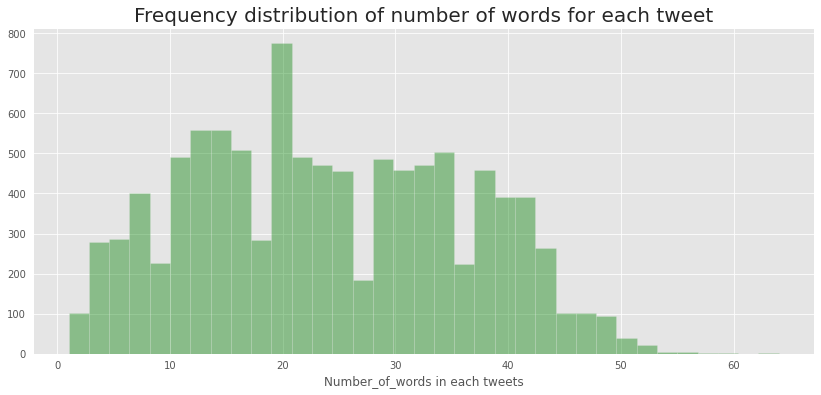

In [ ]:
df2['Number_of_words in each tweets'] = df2['Cleaned Tweets Further'].apply(lambda x:len(str(x).split()))

plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(df2['Number_of_words in each tweets'], kde = False,color="green")
plt.title("Frequency distribution of number of words for each tweet", size=20)

In [ ]:
max(df2['Number_of_words in each tweets']), min(df2['Number_of_words in each tweets'])

(64, 1)

**As for this file there is no column with name 'Category', which seperated flood from non-flood tweets, so only creation of single word cloud for the whole data is possible for this file.**

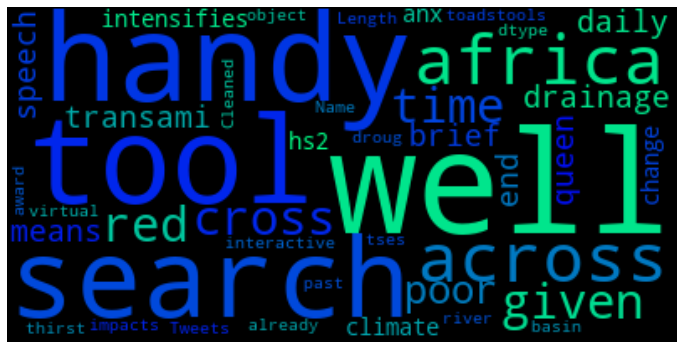

In [ ]:
cloud=WordCloud(colormap="winter").generate(str(df2["Cleaned Tweets Further"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

Text(0.5, 1.0, '30 most frequent words')

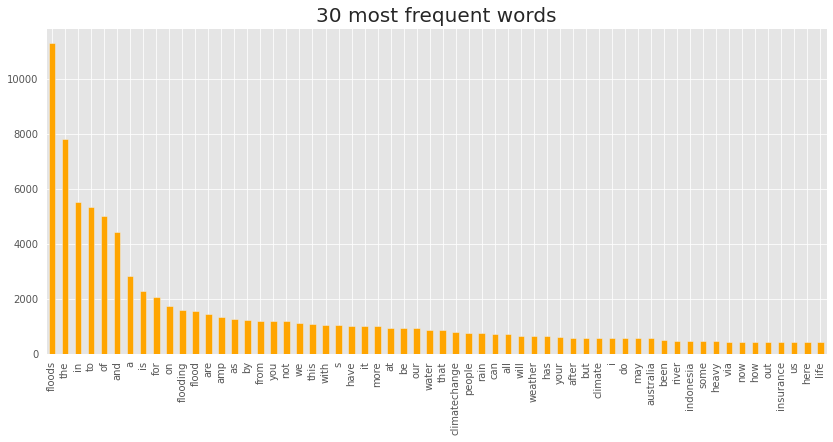

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df2["Cleaned Tweets Further"]).split()).value_counts()[:60]
freq.plot(kind="bar", color = "orange")
plt.title("30 most frequent words",size=20)

***Date Analysis***              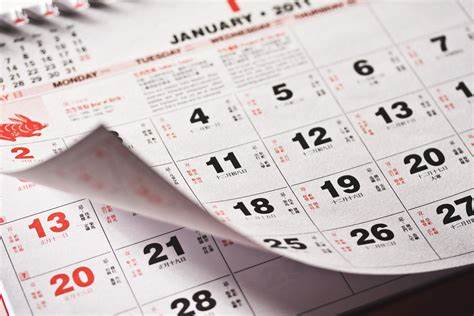

In [ ]:
df2['date'] = pd.to_datetime(df2['date'])

df2['Which Day'] = df2['date'].dt.day_name()
df2['Year'] = df2['date'].dt.year
df2['Month'] = (df2['date'].dt.month_name())

Text(0.5, 1.0, 'Frequecy showing which year has more data')

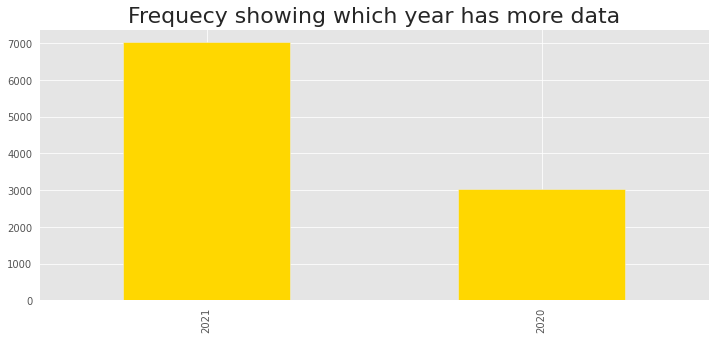

In [ ]:
plt.figure(figsize = (12,5))
df2['Year'].value_counts().plot(kind = 'bar', color = 'gold')
plt.title('Frequecy showing which year has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which month has more data')

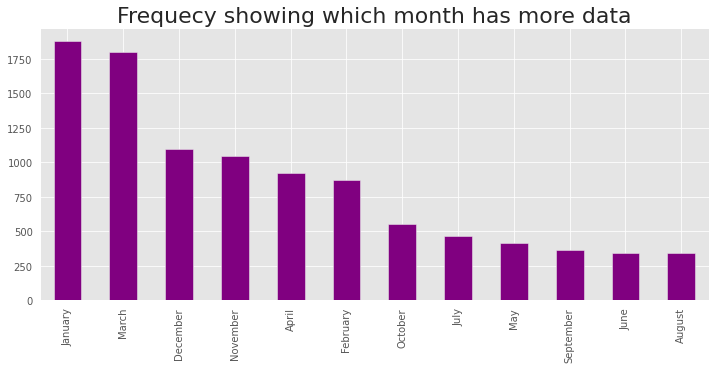

In [ ]:
plt.figure(figsize = (12,5))
df2['Month'].value_counts().plot(kind = 'bar', color = 'purple')
plt.title('Frequecy showing which month has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which year has more data')

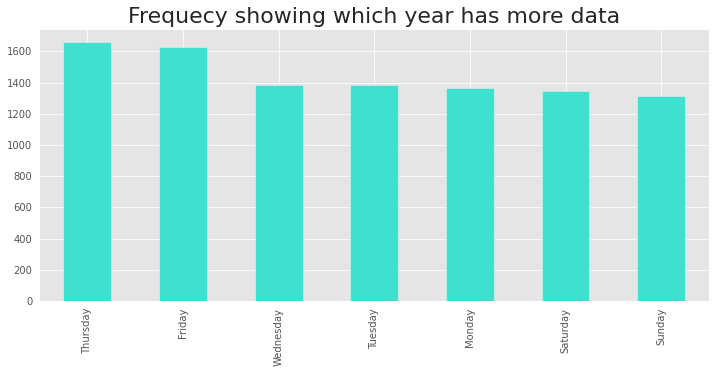

In [ ]:
plt.figure(figsize = (12,5))
df2['Which Day'].value_counts().plot(kind = 'bar', color = 'turquoise')
plt.title('Frequecy showing which year has more data', size = 22)

# EDA for preprocessed_twitter_df_may14.csv

In [ ]:
df4 = pd.read_csv(r'/content/drive/MyDrive/preprocessed_twitter_df_may14.csv')
df4.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language,Cleaned Tweets,cleaned_emoji_removed
0,1.22598E+18,@caleb_efird I had to go see for myself and......,14-05-2021 23:59,Hayden Flood,flood_hayden,NaN,NaN,NaN,en,i had to go se for myself and.it gets worse,i had to go se for myself and.it gets worse
1,1.28135E+18,if it in the ground it will grow in food waste...,21-05-2021 23:59,Robert McFarland,RobertM06666153,"Marion, SC",NaN,"Marion, SC",en,if it in the ground it wil grow in fod waste i...,if it in the ground it wil grow in fod waste i...
2,3362182379,Monitoring the local river levels in Braithwai...,21-05-2021 23:59,CA125SY,CA125SY,"Braithwaite, England",NaN,NaN,en,monitoring the local river levels in braithwai...,monitoring the local river levels in braithwai...
3,2418108972,all the water leaving my brain to go flood my ...,21-05-2021 23:59,嗚呼☆,GaikotsuRamen,🇨🇵,NaN,NaN,en,al the water leaving my brain to go flood my pus,al the water leaving my brain to go flood my pus
4,2531338800,@ozthegoatguy Are the goats expecting a flood?...,21-05-2021 23:58,Old Man Dan,notsoyounggrunt,"Durham, NC",NaN,NaN,en,are the goats expecting a flood? they are al h...,are the goats expecting a flood? they are al h...


In [ ]:
def word_counting(text):
  return len(text.split())

df4['Word count of each tweet'] = df4['cleaned_emoji_removed'].apply(word_counting)
df4.head()

,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language,Cleaned Tweets,cleaned_emoji_removed,Word count of each tweet
0,1.22598E+18,@caleb_efird I had to go see for myself and......,14-05-2021 23:59,Hayden Flood,flood_hayden,NaN,NaN,NaN,en,i had to go se for myself and.it gets worse,i had to go se for myself and.it gets worse,10
1,1.28135E+18,if it in the ground it will grow in food waste...,21-05-2021 23:59,Robert McFarland,RobertM06666153,"Marion, SC",NaN,"Marion, SC",en,if it in the ground it wil grow in fod waste i...,if it in the ground it wil grow in fod waste i...,49
2,3362182379,Monitoring the local river levels in Braithwai...,21-05-2021 23:59,CA125SY,CA125SY,"Braithwaite, England",NaN,NaN,en,monitoring the local river levels in braithwai...,monitoring the local river levels in braithwai...,17
3,2418108972,all the water leaving my brain to go flood my ...,21-05-2021 23:59,嗚呼☆,GaikotsuRamen,🇨🇵,NaN,NaN,en,al the water leaving my brain to go flood my pus,al the water leaving my brain to go flood my pus,11
4,2531338800,@ozthegoatguy Are the goats expecting a flood?...,21-05-2021 23:58,Old Man Dan,notsoyounggrunt,"Durham, NC",NaN,NaN,en,are the goats expecting a flood? they are al h...,are the goats expecting a flood? they are al h...,14


In [ ]:
stop=stopwords.words('english')
df4["cleaned_emoji_removed_with_stopwords_also"]=df4["cleaned_emoji_removed"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
def final_preprocess(text):
  clean=re.sub("\s{2,}"," ",text)
  clean = clean.strip()
  return clean

df4["cleaned_emoji_removed_with_stopwords_also"] = df4["cleaned_emoji_removed_with_stopwords_also"].apply(final_preprocess)

In [ ]:
max(df4['Word count of each tweet']), min(df4['Word count of each tweet'])

(67, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each tweet')

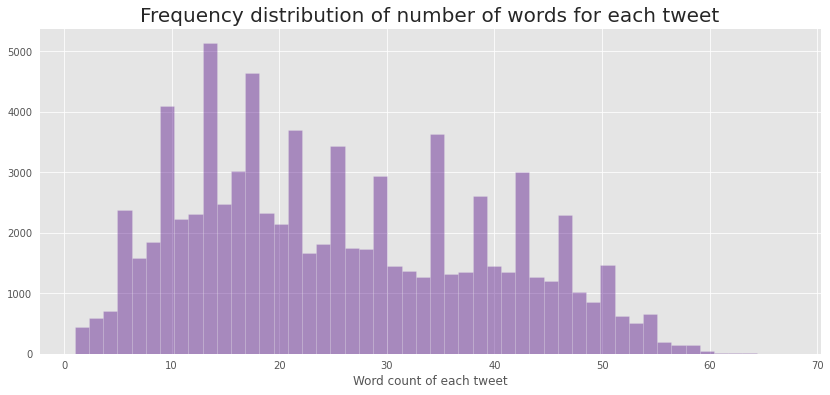

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(df4['Word count of each tweet'], kde = False,color="indigo")
plt.title("Frequency distribution of number of words for each tweet", size=20)

**Word Cloud for the cleaned tweets**

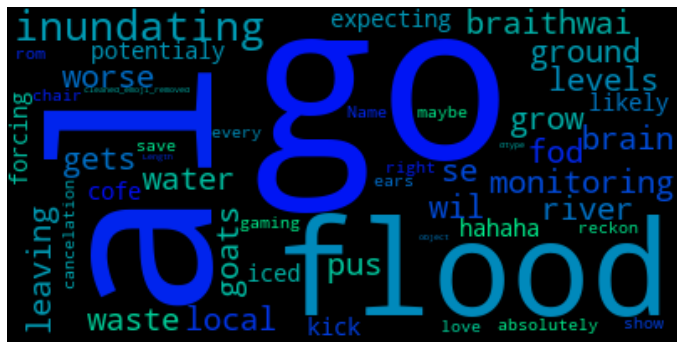

In [ ]:
cloud=WordCloud(colormap="winter").generate(str(df4["cleaned_emoji_removed"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

**Top 40 most frequent words**

Text(0.5, 1.0, '40 most frequent words')

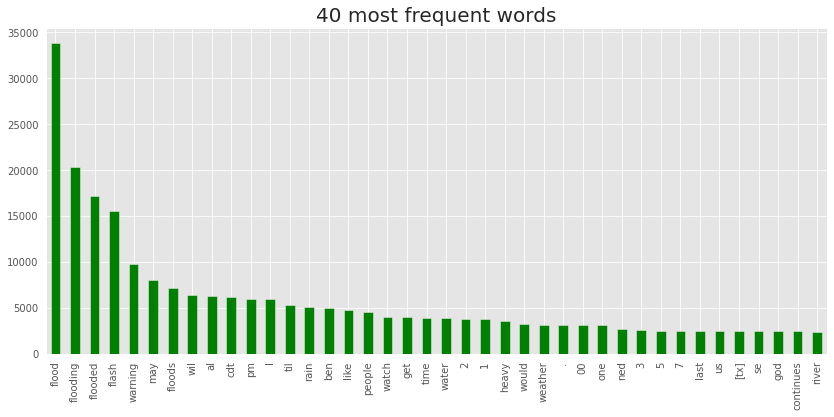

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df4["cleaned_emoji_removed_with_stopwords_also"]).split()).value_counts()[:40]
freq.plot(kind="bar", color = "green")
plt.title("40 most frequent words",size=20)

In [ ]:
df4 = df4.dropna( how='any', subset=['Tweet Time'])
# df4.info()
df4.isnull().sum()

Tweet User Id                                    0
Tweet Text                                       0
Tweet Time                                       0
Tweet User Name                                  3
Twitter @ Name                                   0
Tweet User Location                          20381
Tweet Coordinates                            81018
Place Info                                   79445
Language                                         2
Cleaned Tweets                                   0
cleaned_emoji_removed                            0
Word count of each tweet                         0
cleaned_emoji_removed_with_stopwords_also        0
dtype: int64

# EDA for final_preprocessed_instagram_merged.csv

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/final_preprocessed_instagram_merged.csv')
del df5['Unnamed: 0']
del df5['404: Not Found']
df5.head()

,id,caption,comments_count,like_count,media_type,media_url,permalink,timestamp,children,skipped,cleaned_caption,cleaned_caption_emoji_rem
0,1.800000e+16,Geburtstagsausflug // 01.06.2021\n#geburtstag ...,0.0,10,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPl4xvtFnC7/,2021-06-01T21:04:25+0000,NaN,NaN,geburtstagsausflug 01.06.2021 geburtstag ausfl...,geburtstagsausflug 01.06.2021 geburtstag ausfl...
1,1.790000e+16,Kennt Ihr Amrum? Ich war nun das erste Mal auf...,0.0,8,CAROUSEL_ALBUM,NaN,https://www.instagram.com/p/CPl202ChmgW/,2021-06-01T20:47:21+0000,"{'data': [{'id': '17875032620407277'}, {'id': ...",NaN,kennt ihr amrum? ich war nun das erste mal auf...,kennt ihr amrum? ich war nun das erste mal auf...
2,1.790000e+16,Urlaub. Es fühlt sich an wie vom anderen Stern...,0.0,32,CAROUSEL_ALBUM,NaN,https://www.instagram.com/p/CPlz-aIHDDJ/,2021-06-01T20:22:27+0000,"{'data': [{'id': '17948250079448949'}, {'id': ...",NaN,urlaub. es fühlt sich an wie vom anderen stern...,urlaub. es fühlt sich an wie vom anderen stern...
3,1.790000e+16,When the sun goes down #legendärerdanontour #N...,1.0,24,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPlx1X0hXKe/,2021-06-01T20:03:44+0000,NaN,NaN,when the sun goes down legendärerdanontour nor...,when the sun goes down legendärerdanontour nor...
4,1.790000e+16,Mom's Life 😍\n\nIch zeige dir die Welt und noc...,1.0,27,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPltVzTLyfs/,2021-06-01T19:24:28+0000,NaN,NaN,mom's life 😍 ich zeige dir die welt und noch v...,mom's life ich zeige dir die welt und noch vie...


In [ ]:
df5.shape

(806, 12)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         806 non-null    float64
 1   caption                    806 non-null    object 
 2   comments_count             804 non-null    float64
 3   like_count                 806 non-null    int64  
 4   media_type                 806 non-null    object 
 5   media_url                  571 non-null    object 
 6   permalink                  806 non-null    object 
 7   timestamp                  804 non-null    object 
 8   children                   230 non-null    object 
 9   skipped                    479 non-null    object 
 10  cleaned_caption            806 non-null    object 
 11  cleaned_caption_emoji_rem  805 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 75.7+ KB


In [ ]:
df5.describe()

,id,comments_count,like_count
count,8.060000e+02,804.000000,806.000000
mean,1.796228e+16,2.134328,53.901985
std,1.108600e+14,7.503714,161.771771
min,1.780000e+16,0.000000,0.000000
25%,1.790000e+16,0.000000,4.250000
50%,1.790000e+16,0.000000,13.000000
75%,1.800000e+16,2.000000,40.000000
max,1.820000e+16,139.000000,2760.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of likes for instagram text')

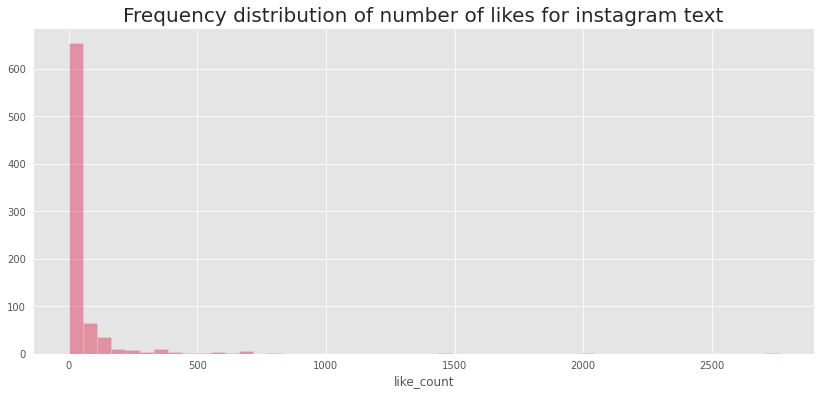

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(df5['like_count'], kde = False,color="crimson")
plt.title("Frequency distribution of number of likes for instagram text", size=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of comments for each tweet')

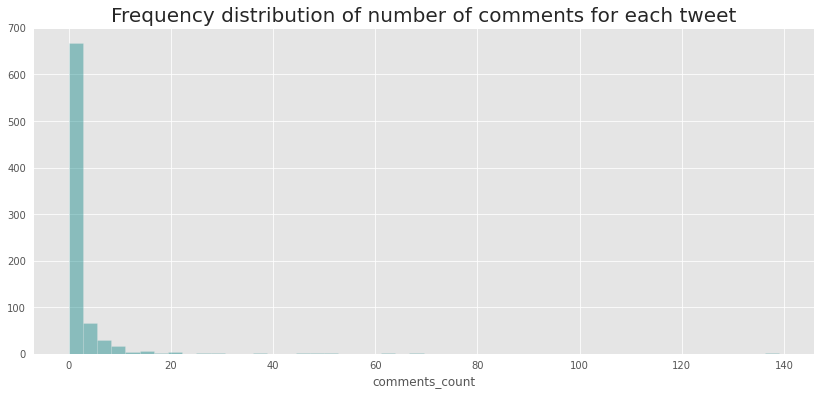

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(df5['comments_count'], kde = False,color="teal")
plt.title("Frequency distribution of number of comments for each tweet", size=20)

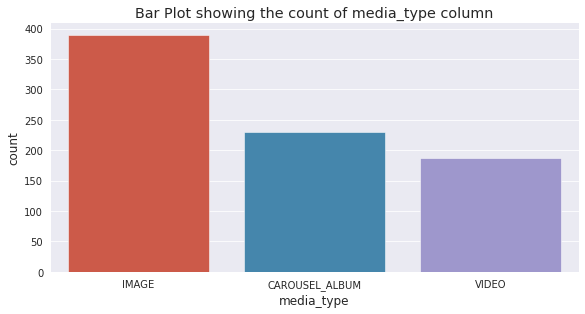

In [ ]:
sns.set_style('darkgrid')
sns.catplot(x = "media_type",data = df5, kind = "count",height=4,aspect=2).set(title = 'Bar Plot showing the count of media_type column')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot showing the distribution of likes count')

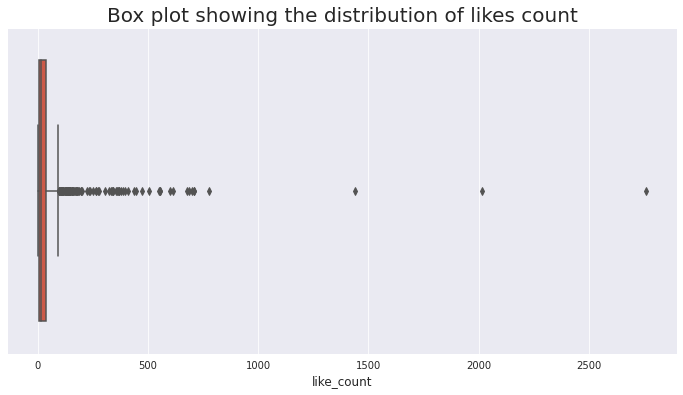

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot("like_count", data=df5)
plt.title('Box plot showing the distribution of likes count', size = 20)

Text(0.5, 1.0, 'Box plot showing the distribution of likes count for 3 media_types')

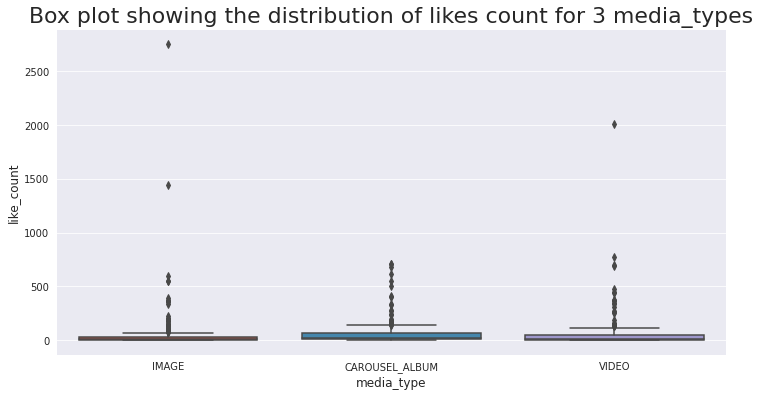

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'media_type',y = "like_count", data=df5)
plt.title('Box plot showing the distribution of likes count for 3 media_types', size = 22)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot showing the distribution of likes count')

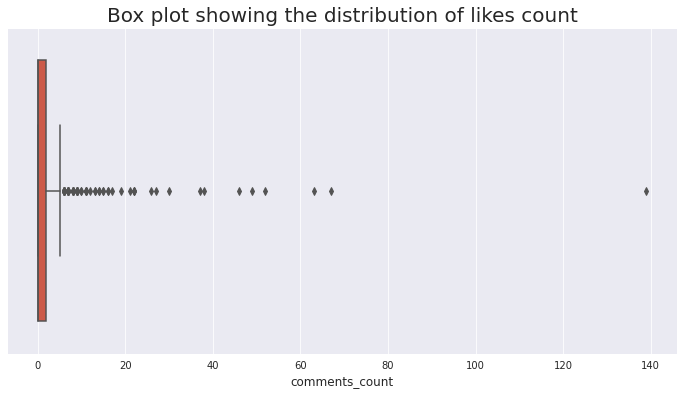

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot("comments_count", data=df5)
plt.title('Box plot showing the distribution of likes count', size = 20)

Text(0.5, 1.0, 'Box plot showing the distribution of comments count for 3 media_types')

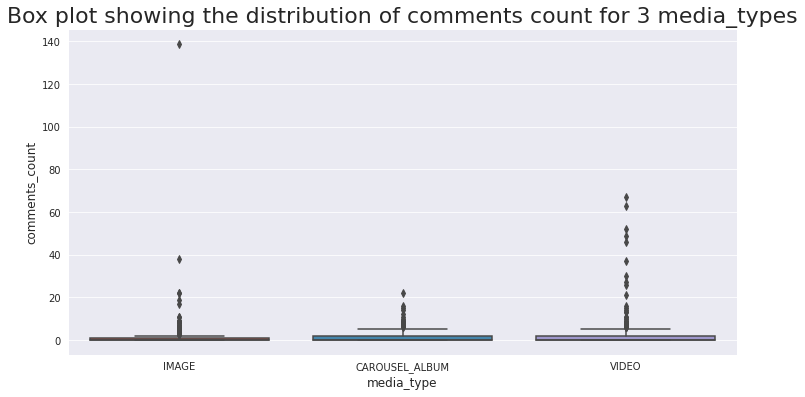

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'media_type',y = "comments_count", data=df5)
plt.title('Box plot showing the distribution of comments count for 3 media_types', size = 22)

In [ ]:
df5['timestamp'] = pd.to_datetime(df5['timestamp'])

Text(0.5, 1.0, 'Frequecy showing which day has more data')

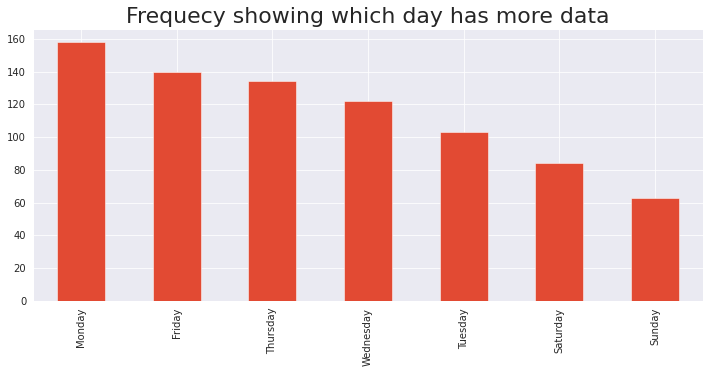

In [ ]:
df5['Which Day'] = df5.timestamp.dt.day_name()
df5['Year'] = df5.timestamp.dt.year
df5['Month'] = (df5.timestamp.dt.month_name())

plt.figure(figsize = (12,5))
df5['Which Day'].value_counts().plot(kind = 'bar')
plt.title('Frequecy showing which day has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which month has more data')

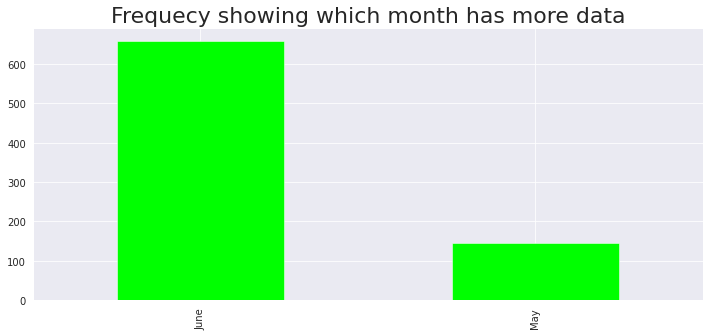

In [ ]:
plt.figure(figsize = (12,5))
df5['Month'].value_counts().plot(kind = 'bar', color = 'lime')
plt.title('Frequecy showing which month has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which year has more data')

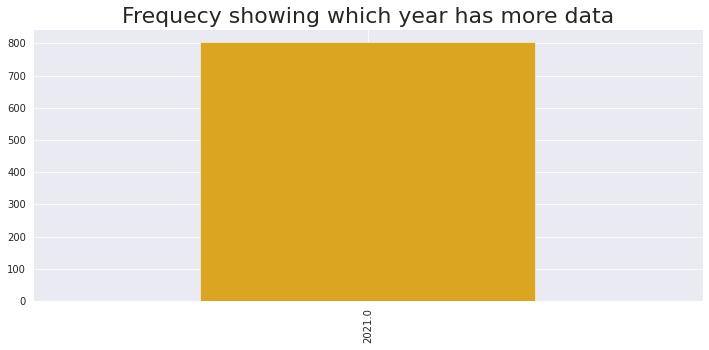

In [ ]:
plt.figure(figsize = (12,5))
df5['Year'].value_counts().plot(kind = 'bar', color = 'goldenrod')
plt.title('Frequecy showing which year has more data', size = 22)

**As already explained, that most of the instagram data is in language other than English, still thought of creating wordcloud..**

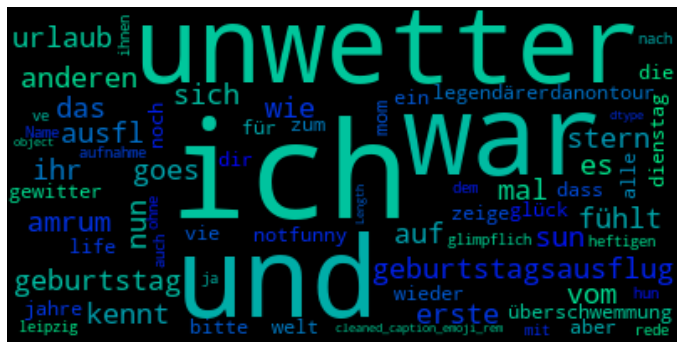

In [ ]:
cloud=WordCloud(colormap="winter").generate(str(df5["cleaned_caption_emoji_rem"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')